#Table of Contents

Data Cleaning

Exploratory Data Analysis

Feature Engineering

Machine learning Modeling

website

Deployment

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/laptop price prediction/laptop_data.csv")

In [ ]:
df.shape

(1303, 12)

In [ ]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [ ]:
print(df.duplicated().sum())

0


Remove unnamed:0 column

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


Remove GB from Ram and kg from weight

In [ ]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


#EDA

Univariate

<ipython-input-14-b020f02619da>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

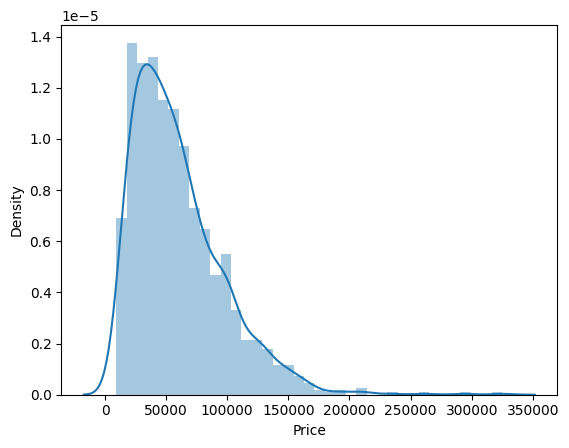

In [ ]:
import seaborn as sns
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

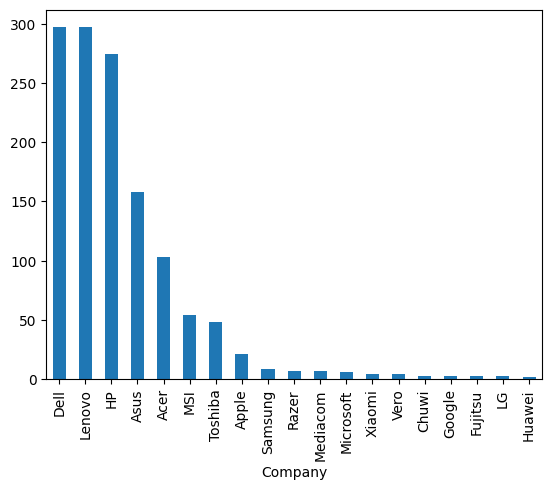

In [ ]:
df['Company'].value_counts().plot(kind='bar')

what is the average price for each brand

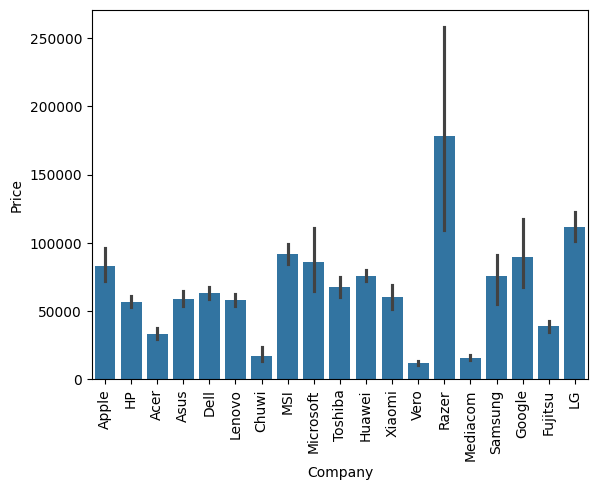

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()


<Axes: xlabel='TypeName'>

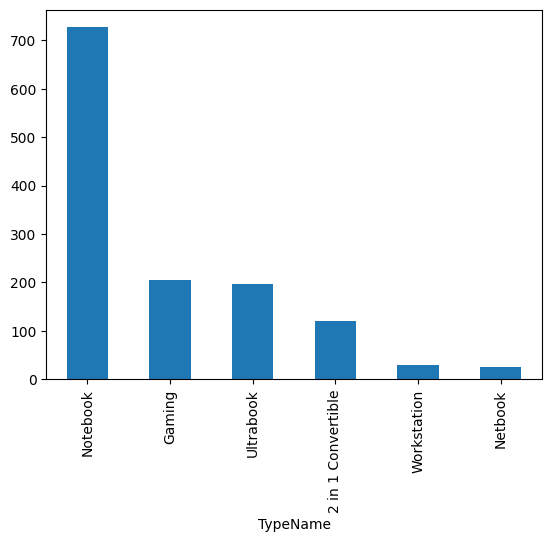

In [ ]:
df["TypeName"].value_counts().plot(kind='bar')

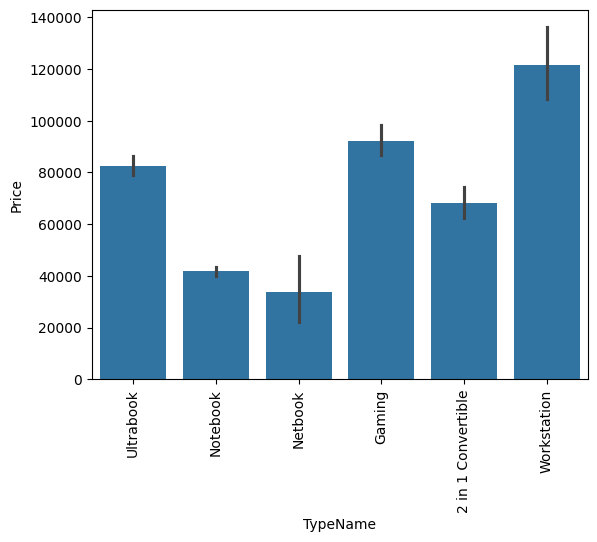

In [ ]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-19-51888cb550e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

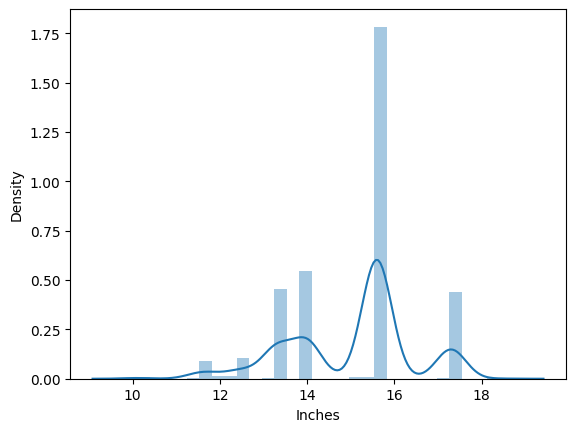

In [ ]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

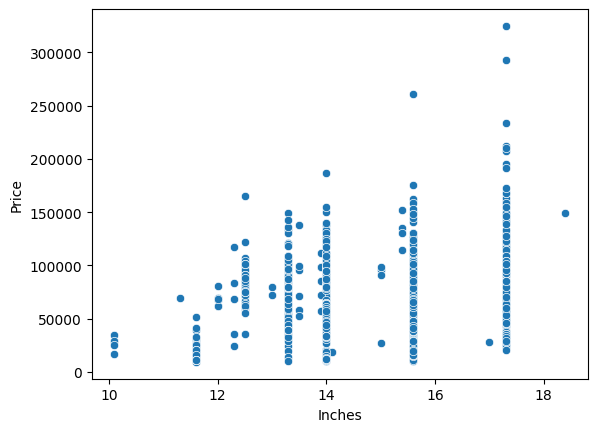

In [ ]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


feature engineering karke ek naya column bana rhe hai touchscreen name se

In [ ]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [ ]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1055,HP,Notebook,15.6,1366x768,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.31,37570.3920,0
1276,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,24455.5200,0
739,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.40,21887.4240,0
829,Acer,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.50,32980.3200,0
1204,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.20,62284.3200,0
374,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62,46300.8528,1
1267,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.30,42943.1472,0
1233,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,85141.4400,0
372,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,AMD Ryzen 1700 3GHz,16,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.25,117162.7200,0
1240,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256GB SSD,AMD Radeon 530,Windows 10,2.20,31838.5296,0


<Axes: xlabel='Touchscreen'>

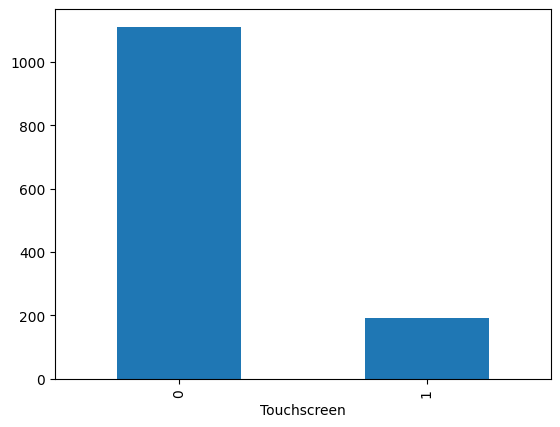

In [ ]:
#kitna touchscreen hai aur nahi hai 0= nahi hai ,1=touchscreen hai
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

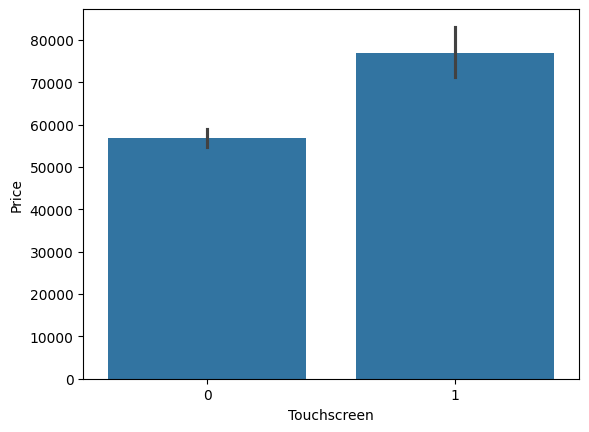

In [ ]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [ ]:
#create new column name is IPS
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='IPS'>

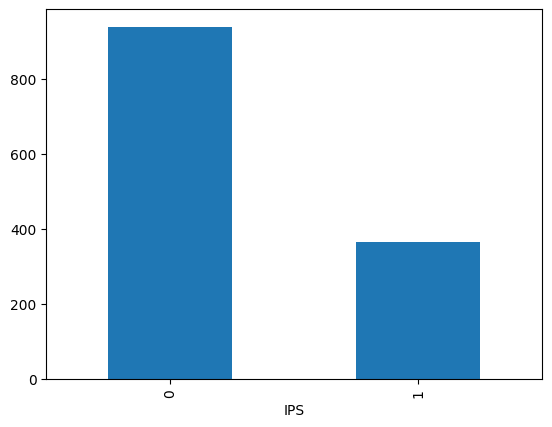

In [ ]:
df['IPS'].value_counts().plot(kind='bar')
#0= not IPS laptop ,1=IPS Laptop

<Axes: xlabel='IPS', ylabel='Price'>

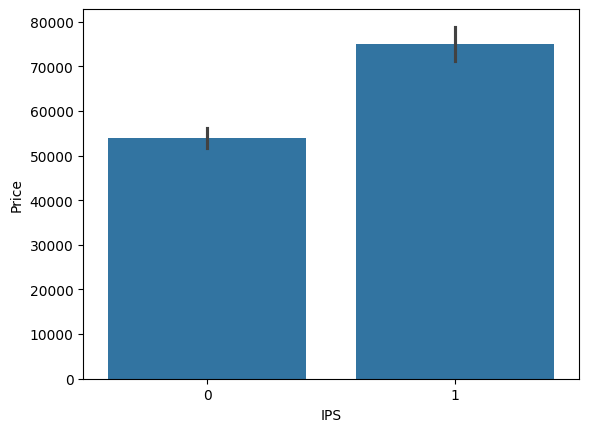

In [ ]:
sns.barplot(x=df['IPS'],y=df['Price'])

In [ ]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [ ]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
372,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,AMD Ryzen 1700 3GHz,16,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.25,117162.7200,0,1,IPS Panel Full HD 1920,1080
586,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.78,79813.4400,0,1,IPS Panel Full HD 1920,1080
783,Lenovo,Notebook,15.6,1366x768,Intel Celeron Quad Core N3710 1.6GHz,8,1TB HDD,Intel HD Graphics 405,No OS,2.20,17529.1200,0,0,1366,768
1039,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.64,53839.9728,0,0,Full HD 1920,1080
808,Dell,Gaming,15.6,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,89457.1200,0,0,4K Ultra HD 3840,2160


In [ ]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [ ]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [ ]:
df.corr(numeric_only=True)['Price']

,Price
Inches,0.068197
Ram,0.743007
Weight,0.210370
Price,1.000000
Touchscreen,0.191226
IPS,0.252208
X_res,0.556529
Y_res,0.552809


In [ ]:
#ppi(pixel per inches) completly new column banega,tin colum ko milakar ppi column banega x-res,Y_res aur inches column
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [ ]:
df.corr(numeric_only=True)['Price']

,Price
Inches,0.068197
Ram,0.743007
Weight,0.210370
Price,1.000000
Touchscreen,0.191226
IPS,0.252208
X_res,0.556529
Y_res,0.552809
ppi,0.473487


In [ ]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [ ]:
df.drop(columns=['X_res','Y_res','Inches'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


In [ ]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [ ]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

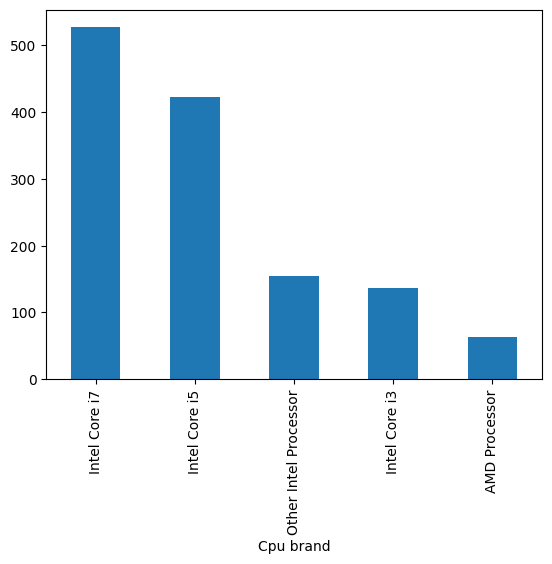

In [ ]:
df['Cpu brand'].value_counts().plot(kind='bar')

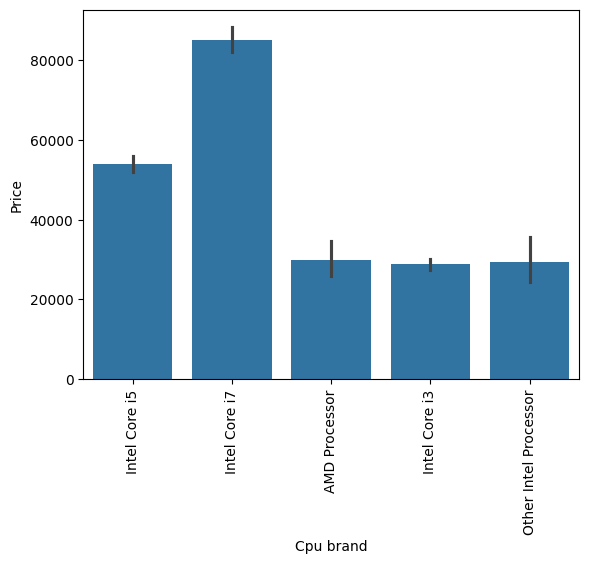

In [ ]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

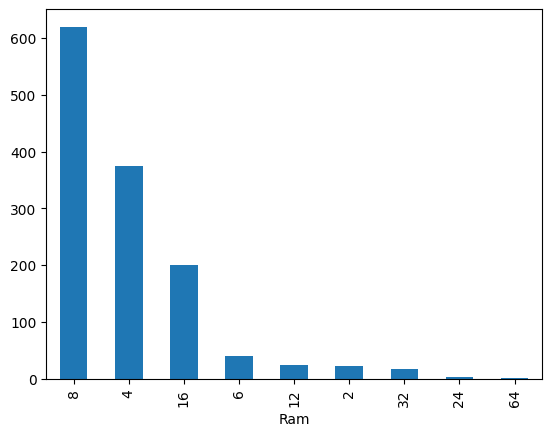

In [ ]:
df['Ram'].value_counts().plot(kind='bar')

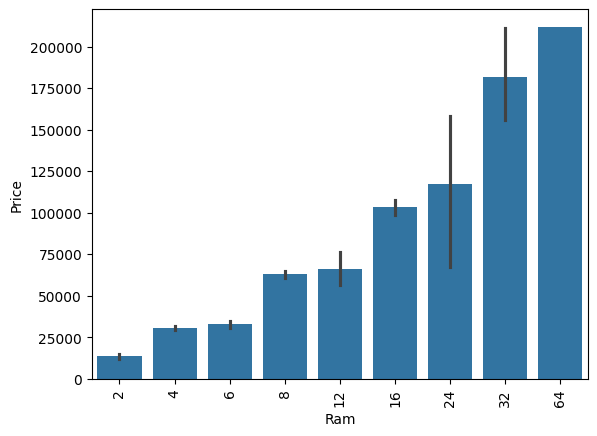

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [ ]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove all non-digit characters from 'second' column
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

df['first'] = df['first'].str.replace(r'\D', '', regex=True) # Add regex=True to ensure proper functionality

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<ipython-input-56-0f36c25134cb>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace = True)


In [ ]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
899,Dell,Notebook,8,500 HDD,Intel HD Graphics 620,Windows 10,1.90,49816.8000,0,0,141.211998,Intel Core i5,500,0,0,0
775,Asus,2 in 1 Convertible,12,2000 HDD,Nvidia GeForce 940MX,Windows 10,2.30,44701.9200,1,0,141.211998,Intel Core i7,2000,0,0,0
52,HP,Notebook,4,256 SSD,AMD Radeon R4 Graphics,Windows 10,1.86,21231.5472,0,0,141.211998,AMD Processor,0,256,0,0
1211,Asus,Notebook,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.20,93186.7200,0,0,141.211998,Intel Core i7,1000,128,0,0
921,HP,Ultrabook,8,256 SSD,AMD Radeon R7 M365X,Windows 10,1.84,69103.6272,0,0,141.211998,Intel Core i7,0,256,0,0


In [ ]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [ ]:
df.corr(numeric_only=True)['Price']

,Price
Ram,0.743007
Weight,0.210370
Price,1.000000
Touchscreen,0.191226
IPS,0.252208
ppi,0.473487
HDD,-0.096441
SSD,0.670799
Hybrid,0.007989
Flash_Storage,-0.040511


In [ ]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)


In [ ]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [ ]:
##graphical procesing unit
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [ ]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [ ]:
df = df[df['Gpu brand'] != 'ARM']

In [ ]:
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180


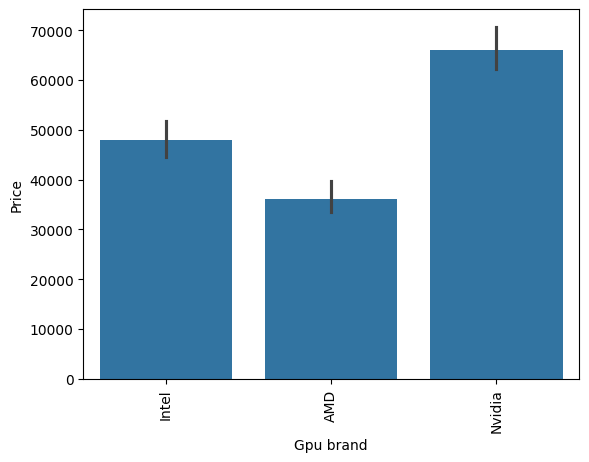

In [ ]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.drop(columns=['Gpu'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


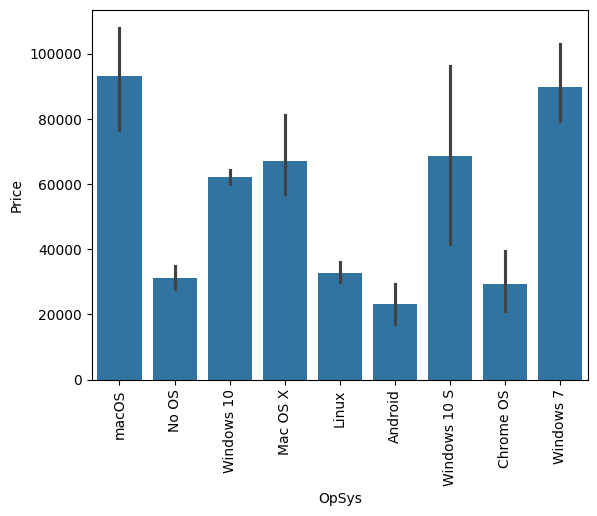

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
df['os'] = df['OpSys'].apply(cat_os)

In [ ]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
df.drop(columns=['OpSys'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


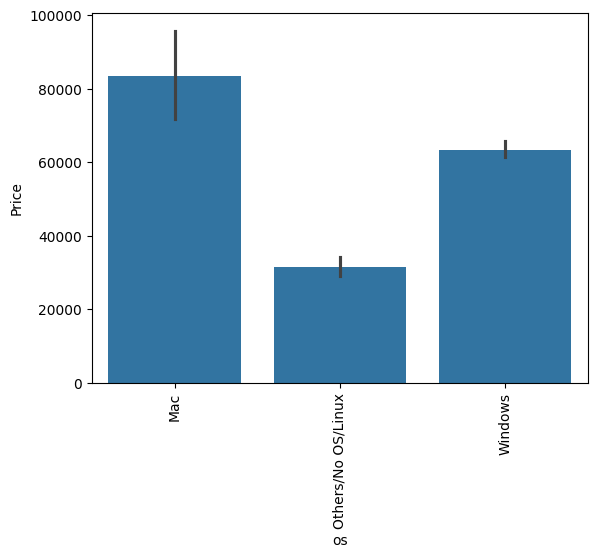

In [ ]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-80-cb6c2ccbebf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

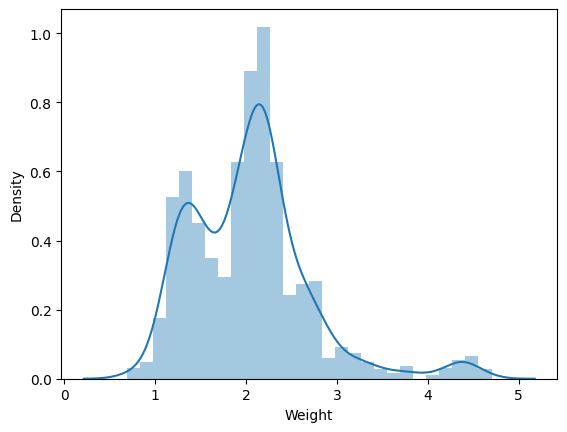

In [ ]:
#weight is continuous column
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

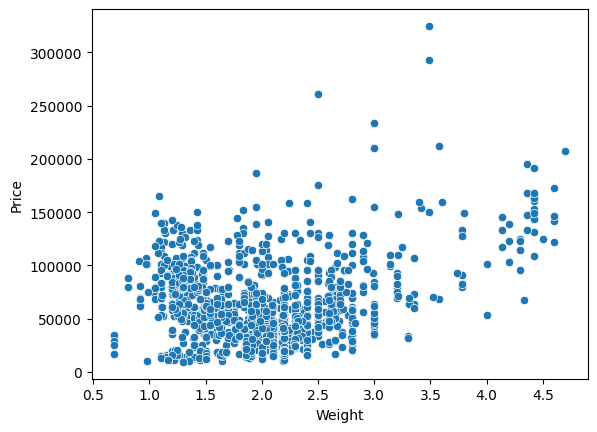

In [ ]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [ ]:
df.corr(numeric_only=True)['Price']

,Price
Ram,0.742905
Weight,0.209867
Price,1.000000
Touchscreen,0.192917
IPS,0.253320
ppi,0.475368
HDD,-0.096891
SSD,0.670660


<Axes: >

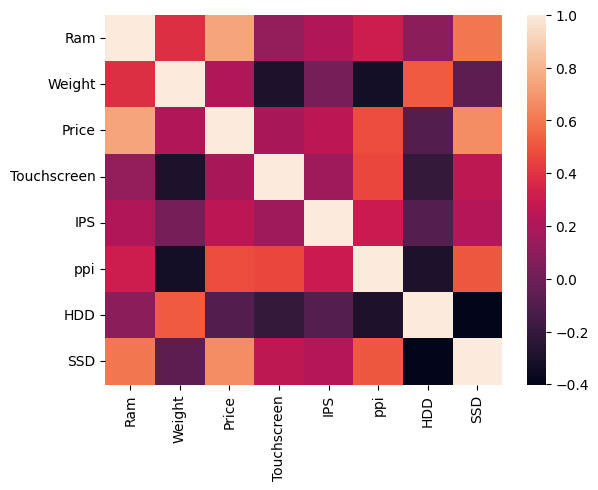

In [ ]:
sns.heatmap(df.corr(numeric_only=True)) # Calculate correlation only for numeric columns

<ipython-input-84-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

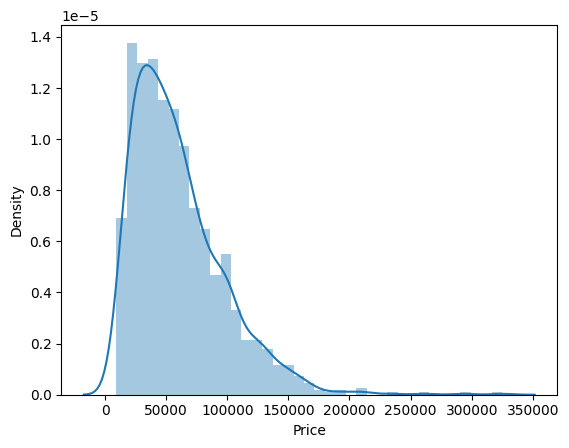

In [ ]:
sns.distplot(df['Price'])

<ipython-input-85-24cb155791a0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

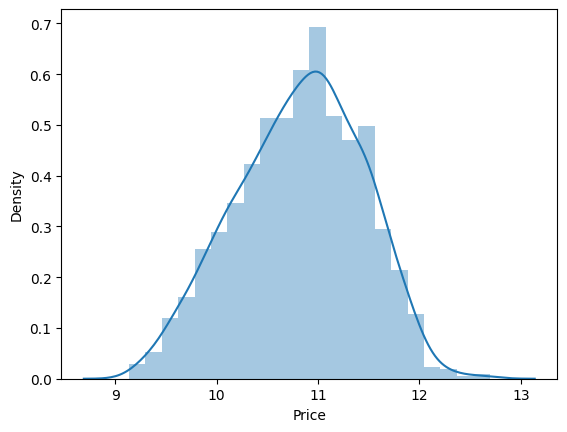

In [ ]:
#target column price hai, aur ye thora sa skewed hai to normal distribution kiye hai log() ka USE Karke
sns.distplot(np.log(df['Price']))

In [ ]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [ ]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [ ]:
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1298,10.433899
1299,11.288115
1300,9.409283
1301,10.614129


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1106, 12), (196, 12), (1106,), (196,))

In [ ]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [ ]:
y_train

,Price
183,10.651384
1141,11.016798
1049,9.638174
1020,10.655148
878,10.791749
...,...
466,10.126164
299,11.267217
493,10.336864
527,10.104611


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

#Linear regression

In [ ]:
# Step 1: Preprocessing the data using ColumnTransformer
# Replace 'sparse=False' with 'sparse_output=False' to avoid the deprecation warning
# and ensure a dense matrix is returned.
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Step 2: Define the Linear Regression model
step2 = LinearRegression()

# Create a pipeline that sequentially applies the preprocessing and then fits the model
pipe = Pipeline([
    ('step1', step1),  # Apply column transformer for data preprocessing
    ('step2', step2)   # Fit the linear regression model
])

# Fit the pipeline on the training data (X_train for features, y_train for target)
pipe.fit(X_train, y_train)

# Make predictions on the test data (X_test)
y_pred = pipe.predict(X_test)

# Evaluate the model using R2 score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))  # R2 score tells how well the model fits the data
print('MAE:', mean_absolute_error(y_test, y_pred))  # MAE gives the average of the absolute errors in prediction


R2 score: 0.807327744841864
MAE: 0.21017827976428802


#Ridge Regression

In [ ]:
# Step 1: Preprocessing the data using ColumnTransformer
# We are applying OneHotEncoder to categorical columns (indices [0, 1, 7, 10, 11])
# 'drop=first' ensures the first category is dropped to avoid the dummy variable trap
# 'remainder=passthrough' allows all other columns to pass through unchanged
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Step 2: Define Ridge Regression model with regularization strength (alpha=10)
# Ridge regression applies L2 regularization to prevent overfitting by penalizing large coefficients
step2 = Ridge(alpha=10)

# Create a pipeline to apply preprocessing (step1) followed by Ridge Regression (step2)
pipe = Pipeline([
    ('step1', step1),  # Preprocessing step using ColumnTransformer
    ('step2', step2)   # Ridge Regression model
])

# Fit the pipeline on training data (X_train for features, y_train for target)
pipe.fit(X_train, y_train)

# Make predictions on the test data (X_test)
y_pred = pipe.predict(X_test)

# Evaluate the model using R2 score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))  # R2 score shows how well the model fits the data
print('MAE:', mean_absolute_error(y_test, y_pred))  # MAE calculates the average of the absolute prediction errors


R2 score: 0.8127331031311809
MAE: 0.20926802242582968


#Lasso Regression

In [ ]:
# Step 1: Preprocessing using ColumnTransformer
# OneHotEncoder is applied to categorical columns with indices [0, 1, 7, 10, 11]
# 'sparse=False' ensures a dense matrix is returned instead of a sparse one
# 'drop=first' drops the first category in each feature to avoid multicollinearity
# 'remainder=passthrough' allows all other columns (numeric ones, for instance) to pass through unchanged
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Step 2: Define Lasso Regression model with alpha=0.001
# Lasso Regression applies L1 regularization, which helps in feature selection by shrinking less important feature weights to zero
# 'alpha=0.001' is the regularization strength; smaller values make Lasso act more like ordinary linear regression
step2 = Lasso(alpha=0.001)

# Create a pipeline that first applies the preprocessing step (step1) and then the Lasso model (step2)
pipe = Pipeline([
    ('step1', step1),  # Preprocessing step using ColumnTransformer
    ('step2', step2)   # Lasso Regression model
])

# Fit the pipeline on the training data (X_train for input features, y_train for target variable)
pipe.fit(X_train, y_train)

# Make predictions on the test data (X_test)
y_pred = pipe.predict(X_test)

# Evaluate the model's performance using R2 score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))  # R2 score measures how well the model fits the data
print('MAE:', mean_absolute_error(y_test, y_pred))  # MAE calculates the average of the absolute errors between predicted and actual values

R2 score: 0.8071853945317105
MAE: 0.21114361613472565


#KNN

In [ ]:
# Step 1: Preprocessing with ColumnTransformer
# Apply OneHotEncoder to categorical columns [0, 1, 7, 10, 11]
# 'sparse=False' ensures a dense matrix is returned instead of a sparse one
# 'drop="first"' drops the first category to avoid multicollinearity
# 'remainder="passthrough"' allows the rest of the columns to pass through without transformation
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Step 2: K-Nearest Neighbors Regressor
# Set the number of neighbors (k) to 3, meaning the prediction will be based on the average of the 3 nearest neighbors
step2 = KNeighborsRegressor(n_neighbors=3)

# Creating a pipeline that first applies preprocessing (step1) and then KNN regression (step2)
pipe = Pipeline([
    ('step1', step1),  # Apply preprocessing
    ('step2', step2)   # Apply KNN regression
])

# Fit the pipeline on training data (X_train for features, y_train for target)
pipe.fit(X_train, y_train)

# Predict the target values for the test set (X_test)
y_pred = pipe.predict(X_test)

# Evaluate the model's performance using R2 score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))  # R2 score shows how well the model fits the data
print('MAE:', mean_absolute_error(y_test, y_pred))  # MAE gives the average of the absolute errors between predicted and actual values


R2 score: 0.8017673664034364
MAE: 0.19346118183798544


#Decision Tree

In [ ]:
# Step 1: Preprocessing with ColumnTransformer
# OneHotEncoder is applied to categorical columns at indices [0, 1, 7, 10, 11]
# 'sparse=False' ensures the encoder returns a dense array instead of a sparse matrix
# 'drop="first"' drops the first category to avoid the dummy variable trap (redundancy)
# 'remainder="passthrough"' keeps all other columns as they are without transformation
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Step 2: Decision Tree Regressor
# A decision tree regressor is used with a maximum depth of 8 to control overfitting
# 'max_depth=8' limits the depth of the tree, ensuring the model doesn't become too complex
step2 = DecisionTreeRegressor(max_depth=8)

# Creating a pipeline to apply preprocessing (step1) followed by the decision tree regressor (step2)
pipe = Pipeline([
    ('step1', step1),  # Preprocessing step with one-hot encoding
    ('step2', step2)   # Decision tree regressor
])

# Fit the pipeline on the training data (X_train for features, y_train for target)
pipe.fit(X_train, y_train)

# Predict the target values for the test set (X_test)
y_pred = pipe.predict(X_test)

# Evaluate the model using R2 score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))  # R2 score shows how well the model fits the data
print('MAE:', mean_absolute_error(y_test, y_pred))  # MAE calculates the average absolute errors in predictions


R2 score: 0.8382115008742222
MAE: 0.18251263827416744


#SVM

In [ ]:
# Step 1: Preprocessing with ColumnTransformer
# OneHotEncoder is applied to categorical columns [0, 1, 7, 10, 11]
# 'sparse=False' ensures the encoder returns a dense matrix instead of a sparse one
# 'drop="first"' drops the first category to avoid multicollinearity (dummy variable trap)
# 'remainder="passthrough"' ensures all other columns not transformed are passed through unchanged
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Step 2: Support Vector Regression (SVR)
# SVR is initialized with a radial basis function (RBF) kernel
# 'C=10000' is a regularization parameter that controls trade-off between error and model complexity
# 'epsilon=0.1' specifies the margin of error where no penalty is given to errors
step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

# Creating a pipeline to first apply preprocessing (step1) and then fit the SVR model (step2)
pipe = Pipeline([
    ('step1', step1),  # Apply OneHotEncoder to categorical variables
    ('step2', step2)   # Apply SVR with RBF kernel
])

# Fit the pipeline on the training data (X_train for features, y_train for target)
pipe.fit(X_train, y_train)

# Predict the target values for the test set (X_test)
y_pred = pipe.predict(X_test)

# Evaluate the model's performance using R2 score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))  # R2 score indicates how well the model fits the data
print('MAE:', mean_absolute_error(y_test, y_pred))  # MAE gives the average absolute error in predictions


R2 score: 0.8083180902272435
MAE: 0.20239059427315706


#Random Forest

In [ ]:
# Step 1: Preprocessing with ColumnTransformer
# OneHotEncoder is applied to categorical columns [0, 1, 7, 10, 11]
# 'sparse=False' ensures the encoder returns a dense matrix instead of a sparse one
# 'drop="first"' drops the first category to avoid multicollinearity
# 'remainder="passthrough"' ensures all other columns are passed through without transformation
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Step 2: Random Forest Regressor
# RandomForestRegressor is initialized with several hyperparameters to control its complexity and performance:
# - 'n_estimators=100' specifies the number of trees in the forest (100 trees in this case)
# - 'random_state=3' ensures reproducibility by fixing the random seed
# - 'max_samples=0.5' means that each tree is trained on 50% of the available samples (for bootstrap sampling)
# - 'max_features=0.75' specifies that each tree is allowed to consider 75% of the total features when splitting a node
# - 'max_depth=15' limits the maximum depth of each tree to 15 levels to prevent overfitting
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

# Creating a pipeline to first apply preprocessing (step1) and then fit the Random Forest Regressor (step2)
pipe = Pipeline([
    ('step1', step1),  # Apply OneHotEncoder to categorical variables
    ('step2', step2)   # Apply Random Forest Regressor
])

# Fit the pipeline on the training data (X_train for features, y_train for target)
pipe.fit(X_train, y_train)

# Predict the target values for the test set (X_test)
y_pred = pipe.predict(X_test)

# Evaluate the model's performance using R2 score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))  # R2 score shows how well the model fits the data
print('MAE:', mean_absolute_error(y_test, y_pred))  # MAE gives the average of the absolute errors between predicted and actual values


R2 score: 0.8873402378382488
MAE: 0.15860130110457718


#ExtraTrees

In [ ]:
# Step 1: Preprocessing with ColumnTransformer
# OneHotEncoder is applied to categorical columns [0, 1, 7, 10, 11]
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Step 2: Extra Trees Regressor
# Enable bootstrapping by setting 'bootstrap=True'
step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,    # now valid since bootstrap=True
                              max_features=0.75,
                              max_depth=15,
                              bootstrap=True)     # Enable bootstrapping

# Creating a pipeline to first apply preprocessing (step1) and then fit the Extra Trees Regressor (step2)
pipe = Pipeline([
    ('step1', step1),  # Apply OneHotEncoder to categorical variables
    ('step2', step2)   # Apply Extra Trees Regressor
])

# Fit the pipeline on the training data (X_train for features, y_train for target)
pipe.fit(X_train, y_train)

# Predict the target values for the test set (X_test)
y_pred = pipe.predict(X_test)

# Evaluate the model's performance using R2 score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))  # R2 score shows how well the model fits the data
print('MAE:', mean_absolute_error(y_test, y_pred))  # MAE gives the average of the absolute errors between predicted and actual values


R2 score: 0.8850720167552375
MAE: 0.16154538000217084


#AdaBoost

In [ ]:
# Step 1: Preprocessing with ColumnTransformer
# OneHotEncoder is applied to categorical columns [0, 1, 7, 10, 11]
# 'sparse=False' ensures the encoder returns a dense matrix instead of a sparse one
# 'drop="first"' drops the first category to avoid multicollinearity
# 'remainder="passthrough"' ensures all other columns that are not transformed remain unchanged
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Step 2: AdaBoost Regressor
# AdaBoostRegressor is initialized with two main hyperparameters:
# - 'n_estimators=15' specifies the number of weak learners (decision trees) to be used in the ensemble (15 trees in this case)
# - 'learning_rate=1.0' controls the contribution of each weak learner, where a higher value increases their impact
step2 = AdaBoostRegressor(n_estimators=15, learning_rate=1.0)

# Creating a pipeline to first apply preprocessing (step1) and then fit the AdaBoost Regressor (step2)
pipe = Pipeline([
    ('step1', step1),  # Apply OneHotEncoder to categorical variables
    ('step2', step2)   # Apply AdaBoost Regressor
])

# Fit the pipeline on the training data (X_train for features, y_train for target)
pipe.fit(X_train, y_train)

# Predict the target values for the test set (X_test)
y_pred = pipe.predict(X_test)

# Evaluate the model's performance using R2 score and Mean Absolute Error (MAE)
# R2 score shows how well the model fits the data
print('R2 score', r2_score(y_test, y_pred))
# MAE gives the average of the absolute errors between predicted and actual values
print('MAE', mean_absolute_error(y_test, y_pred))


R2 score 0.7882280357074509
MAE 0.23331214570570216


#Gradient Boost

In [ ]:
# Step 1: Preprocessing with ColumnTransformer
# OneHotEncoder is applied to categorical columns [0, 1, 7, 10, 11]
# 'sparse=False' ensures the encoder returns a dense matrix instead of a sparse one
# 'drop="first"' drops the first category to avoid multicollinearity
# 'remainder="passthrough"' ensures all other columns that are not transformed remain unchanged
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Step 2: Gradient Boosting Regressor
# GradientBoostingRegressor is initialized with one main hyperparameter:
# - 'n_estimators=500' specifies the number of boosting stages to be used (500 trees in this case), which helps in improving model performance
step2 = GradientBoostingRegressor(n_estimators=500)

# Creating a pipeline to first apply preprocessing (step1) and then fit the Gradient Boosting Regressor (step2)
pipe = Pipeline([
    ('step1', step1),  # Apply OneHotEncoder to categorical variables
    ('step2', step2)   # Apply Gradient Boosting Regressor
])

# Fit the pipeline on the training data (X_train for features, y_train for target)
pipe.fit(X_train, y_train)

# Predict the target values for the test set (X_test)
y_pred = pipe.predict(X_test)

# Evaluate the model's performance using R2 score and Mean Absolute Error (MAE)
# R2 score shows how well the model fits the data
print('R2 score', r2_score(y_test, y_pred))
# MAE gives the average of the absolute errors between predicted and actual values
print('MAE', mean_absolute_error(y_test, y_pred))


R2 score 0.8827722199124255
MAE 0.1593379364798842


#Voting Regressor

In [ ]:
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
# Step 1: Preprocessing with ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])  # One-hot encode specified columns
], remainder='passthrough')  # Pass through other columns unchanged

# Step 2: Define individual regression models
rf = RandomForestRegressor(n_estimators=350, random_state=3, max_features=0.75, max_depth=15, bootstrap=True)  # Enable bootstrapping
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
et = ExtraTreesRegressor(n_estimators=100, random_state=3, bootstrap=True, max_features=0.75, max_depth=10)  # Enable bootstrapping

# Step 3: Voting Regressor combining the individual regressors
step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('et', et)], weights=[5, 1, 1])

# Step 4: Creating the pipeline
pipe = Pipeline([
    ('step1', step1),  # Apply preprocessing
    ('step2', step2)   # Apply Voting Regressor
])

# Fit the pipeline on the training data (X_train for features, y_train for target)
pipe.fit(X_train, y_train)

# Predict the target values for the test set (X_test)
y_pred = pipe.predict(X_test)

# Evaluate the model's performance using R2 score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8918277882024886
MAE: 0.1560338706255718


#Stacking

In [ ]:
from sklearn.ensemble import VotingRegressor, StackingRegressor
# Step 1: Preprocessing with ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])  # Use sparse_output instead of sparse
], remainder='passthrough')  # Pass through other columns unchanged

# Step 2: Define individual regression models
estimators = [
    ('rf', RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)),
    ('gbdt', GradientBoostingRegressor(n_estimators=100, max_features=0.5))
]

# Step 3: Stacking Regressor
step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

# Step 4: Creating the pipeline
pipe = Pipeline([
    ('step1', step1),  # Apply preprocessing
    ('step2', step2)   # Apply Stacking Regressor
])

# Fit the pipeline on the training data (X_train for features, y_train for target)
pipe.fit(X_train, y_train)

# Predict the target values for the test set (X_test)
y_pred = pipe.predict(X_test)

# Evaluate the model's performance using R2 score and Mean Absolute Error (MAE)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8721441697678882
MAE: 0.17251189618268922


#Exporting the Model

In [ ]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.106.193.35


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.193.35:8501

Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) y
your url is: https://grumpy-months-matter.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
2024-10-22 10:34:10.024 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/exec